<a href="https://colab.research.google.com/github/KrishnaSolo/ML/blob/master/assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

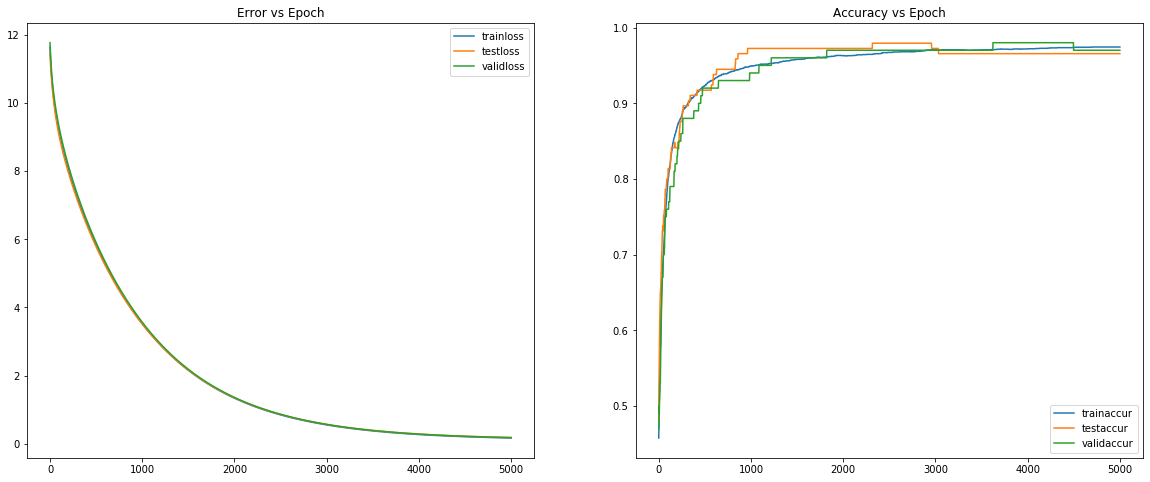

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def loadData():
    with np.load('notMNIST.npz') as data :
        Data, Target = data ['images'], data['labels']
        posClass = 2
        negClass = 9
        dataIndx = (Target==posClass) + (Target==negClass)
        Data = Data[dataIndx]/255.
        Target = Target[dataIndx].reshape(-1, 1)
        Target[Target==posClass] = 1
        Target[Target==negClass] = 0
        np.random.seed(421)
        randIndx = np.arange(len(Data))
        np.random.shuffle(randIndx)
        Data, Target = Data[randIndx], Target[randIndx]
        trainData, trainTarget = Data[:3500], Target[:3500]
        validData, validTarget = Data[3500:3600], Target[3500:3600]
        testData, testTarget = Data[3600:], Target[3600:]
    return trainData, validData, testData, trainTarget, validTarget, testTarget

def MSE(W, b, x, y, reg):
    # Your implementation here
    N = np.shape(y)[0];
    l_d = np.matmul(x,W) + b - y
    loss = (np.linalg.norm(l_d)**2)/N + (np.linalg.norm(W)**2)*(reg/2) #use sum instead of dot product
    return loss 

def gradMSE(W, b, x, y, reg):
    # Your implementation here
    N = np.shape(y)[0];
    l_d = np.matmul(x,W) + b - y
    grad_w = (2/N)*np.matmul(np.transpose(x),l_d )+ reg*W
    grad_b = (2/N)*np.sum(l_d)
    return grad_w,grad_b

def crossEntropyLoss(W, b, x, y, reg):
    N = np.shape(y)[0];
    lw = (np.linalg.norm(W)**2)*(reg/2)
    yout = 1.0/(1.0 + np.exp(-(np.matmul(x,W) + b)))
    ld = (np.sum(-(y*np.log(yout)+(1-y)*np.log(1-yout))))/N
    loss = ld+lw
    return loss

def gradCE(W, b, x, y, reg):
    N = np.shape(y)[0];
    yout = 1.0/(1.0 + np.exp(-(np.matmul(x,W) + b))) 
    grad_w = np.matmul(np.transpose(x),(yout-y))/N + reg*W
    grad_b = np.sum(yout-y)/N
    return grad_w,grad_b

def buildGraph(loss="MSE"):
#Initialize weight and bias tensors
tf.set_random_seed(421)
if loss == "MSE":
# Your implementation
elif loss == "CE":
#Your implementation here

def grad_descent(W, b, trainingData, trainingLabels, alpha, epoch, reg, EPS,validData, testData, validTarget, testTarget):
    # Your implementation here
    N = np.shape(trainingLabels)[0];
    d = 784

    w_t = np.transpose(W)
    trainingData = trainingData.reshape((-1, d))
    validData = validData.reshape((-1,d)) 
    testData = testData.reshape((-1,d))

    train_loss = [crossEntropyLoss(w_t,b,trainingData,trainingLabels,reg)]
    valid_loss = [crossEntropyLoss(w_t, b, validData, validTarget, reg)]
    test_loss = [crossEntropyLoss(w_t, b, testData, testTarget, reg)]

    out_train = np.matmul(trainingData,w_t)+b
    train_accur = [np.sum((out_train>=0.5)==trainTarget)/(trainData.shape[0])]

    out_valid = np.matmul(validData,w_t)+b
    valid_accur = [np.sum((out_valid>=0.5)==validTarget)/(validTarget.shape[0])]

    out_test = np.matmul(testData,w_t)+b
    test_accur = [np.sum((out_test>=0.5)==testTarget)/(testData.shape[0])]

    for i in range(epoch): #have to check error somehow?
      w_g, b_g = gradCE(w_t,b,trainingData,trainingLabels,reg)
      w_new = w_t - alpha*w_g
      b_new = b - alpha*b_g
      train_loss.append(crossEntropyLoss(w_new,b_new,trainingData,trainingLabels,reg))
      valid_loss.append(crossEntropyLoss(w_new,b_new,validData,validTarget,reg))
      test_loss.append(crossEntropyLoss(w_new,b_new,testData,testTarget,reg))
      
      out_train = np.matmul(trainingData,w_new)+ b_new
      train_accur.append(np.sum((out_train>=0.5)==trainTarget)/(trainData.shape[0]))

      out_valid = np.matmul(validData,w_new)+ b_new
      valid_accur.append(np.sum((out_valid>=0.5)==validTarget)/(validTarget.shape[0]))

      out_test = np.matmul(testData,w_new)+ b_new
      test_accur.append(np.sum((out_test>=0.5)==testTarget)/(testData.shape[0]))
      error = np.linalg.norm(w_new-w_t)

      if(error < EPS):
        return w_new,b_new
      else:
        w_t = w_new
        b = b_new

    plt.figure(figsize=(20,8))
    plt.subplot(1, 2, 1)
    plt.title("Error vs Epoch")
    plt.plot(range(0,len(train_loss)),train_loss,label='trainloss')
    plt.plot(range(0,len(test_loss)),test_loss,label='testloss')
    plt.plot(range(0,len(valid_loss)),valid_loss,label='validloss')
    plt.legend(loc = 'best')

    plt.subplot(1, 2, 2)
    plt.title("Accuracy vs Epoch")
    plt.plot(range(0,len(train_accur)),train_accur,label='trainaccur')
    plt.plot(range(0,len(test_accur)),test_accur,label='testaccur')
    plt.plot(range(0,len(valid_accur)),valid_accur,label='validaccur')

    plt.legend(loc = 'best')
    plt.show()
    return w_t,b
      


trainData, validData, testData, trainTarget, validTarget, testTarget = loadData()

W = np.random.normal(0,0.5,size=(1,784))
b = 0
alpha = 0.005
epoch = 5000
reg = 0.1 
EPS = 1e-7
W_n, b = grad_descent(W, b, trainData, trainTarget, alpha, epoch, reg, EPS, validData, testData, validTarget, testTarget)



  